In [68]:
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq
from scipy.fft import ifft
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

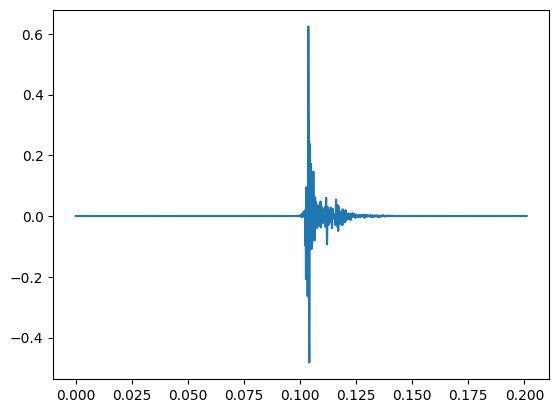

In [69]:
path = 'clap.wav'
window = 5
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

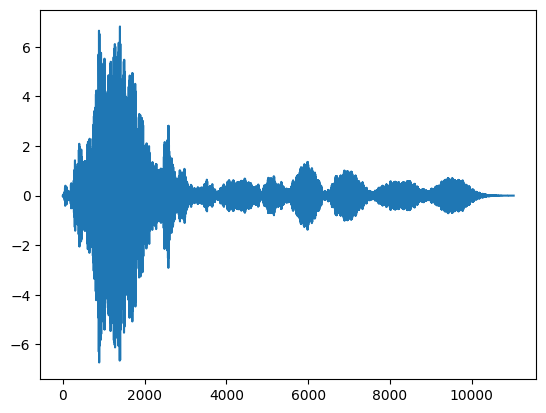

In [70]:
audio_fft = rfft(audio)
sample_period = 1/sample_rate
W=rfftfreq(audio.size,sample_period)
plt.plot(W,audio_fft)
plt.show

In [71]:
def func_fft(audio, sample_rate):
    audio_fft = rfft(audio)
    W = rfftfreq(audio.size,1/sample_rate)
    return audio_fft, W


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=rfftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if audio_fft[i] > average/2:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i]-window > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
               


    
    plt.plot(W,audio_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(64.6773465703971, 74.6773465703971),
 (59.677346570397106, 69.6773465703971),
 (84.55324909747291, 94.55324909747291),
 (194.0072202166065, 204.0072202166065),
 (203.9575812274368, 213.9575812274368),
 (213.90794223826714, 223.90794223826714),
 (223.85830324909747, 233.85830324909747),
 (233.80866425992778, 243.80866425992778),
 (243.75902527075812, 253.75902527075812),
 (243.75902527075812, 253.75902527075812),
 (253.70938628158842, 263.7093862815884),
 (253.70938628158842, 263.7093862815884),
 (263.6597472924188, 273.6597472924188),
 (263.6597472924188, 273.6597472924188),
 (273.6101083032491, 283.6101083032491),
 (273.6101083032491, 283.6101083032491),
 (283.5604693140794, 293.5604693140794),
 (283.5604693140794, 293.5604693140794),
 (293.5108303249097, 303.5108303249097),
 (303.46119133574007, 313.46119133574007),
 (308.4363718411552, 318.4363718411552),
 (313.4115523465704, 323.4115523465704),
 (318.3867328519855, 328.3867328519855),
 (323.3619133574007, 333.3619133574007),
 (32

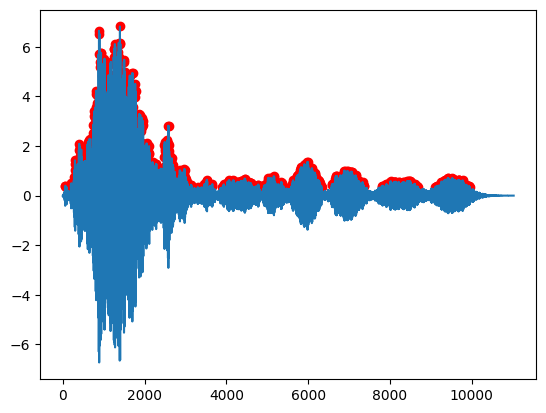

In [72]:
audio_fft, W = func_fft(audio,sample_rate)
ranges = get_ranges(audio_fft, W,sample_rate,window)
ranges

In [76]:
ranges_amp = list()
new_amp = list()

def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,window*2,len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-20*han/20) 
    plt.plot(W,cuttoff)
    return cuttoff


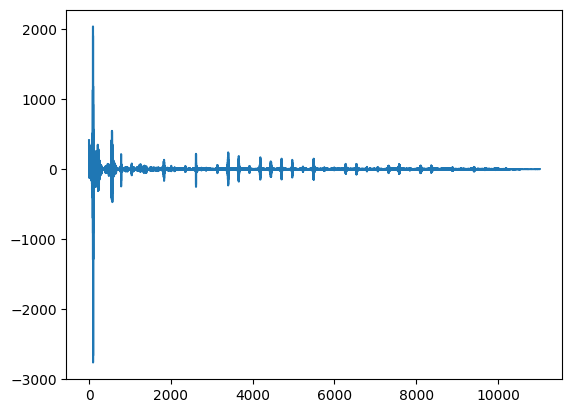

In [77]:
audio_final = irfft(remove_ranges(audio_fft, W, ranges,window))
f, t, Sxx = signal.spectrogram(audio_final, sample_rate)

Audio(audio_final, rate = sample_rate)

In [ ]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)
audio_fft, W = func_fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,window))
Audio(audio_final, rate = sample_rate)